## Number Plate Detection & Recognition using YOLOv11 and Easy OCR

**Author: Abhishek Dey**

### Import Libraries

In [3]:
import os
import cv2
import glob
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
import easyocr


### YOLO Model Training


In [4]:
data="/kaggle/input/number-plate/data.yaml"
pretrained="yolo11n.pt"
imgsz=640
epochs=50
batch=12
project="Number_Plate_Project"
pat=5
opt="Adam"
wk=4
scale=0.8
degrees=180
lr0=0.001

In [5]:
model = YOLO(pretrained) 

results = model.train(data=data, epochs=epochs, imgsz=imgsz, batch=batch, project=project, patience=pat, optimizer=opt, workers=wk, scale=scale, degrees=degrees, lr0=lr0, multi_scale=True)

Ultralytics 8.3.199 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/number-plate/data.yaml, degrees=180, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=True, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=5, perspective=0.0, 

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2048       2195      0.938        0.9       0.93      0.604
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/Number_Plate_Project/train


### Model Evaluation on test set

In [6]:
data="/kaggle/input/number-plate/data.yaml"
model="/kaggle/working/Number_Plate_Project/train/weights/best.pt"
imgsz=640
conf=0.35
iou=0.30
batch=12
project="YOLO_BrainTumor_v1.1"
split="test"
tta=False


# Load a model

model = YOLO(model, task='detect') 

# validation

metrics = model.val(data=data, imgsz=imgsz, batch=batch, save_json=True, conf=conf, iou=iou, rect=False, project=project, split=split, augment=tta)

Ultralytics 8.3.199 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.0±1.0 MB/s, size: 19.5 KB)
val: Scanning /kaggle/input/number-plate/test/labels... 1020 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1020/1020 219.7it/s 4.6s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/number-plate/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 85/85 11.8it/s 7.2s0.1s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1020       1085      0.975      0.896      0.946      0.657
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /kaggle/working/YOLO_BrainTumor_v1.1/val/predictions.json...
Results saved to /kaggle/working/YOLO_BrainTumor_v1.1/val


### Confusion matix (val set)

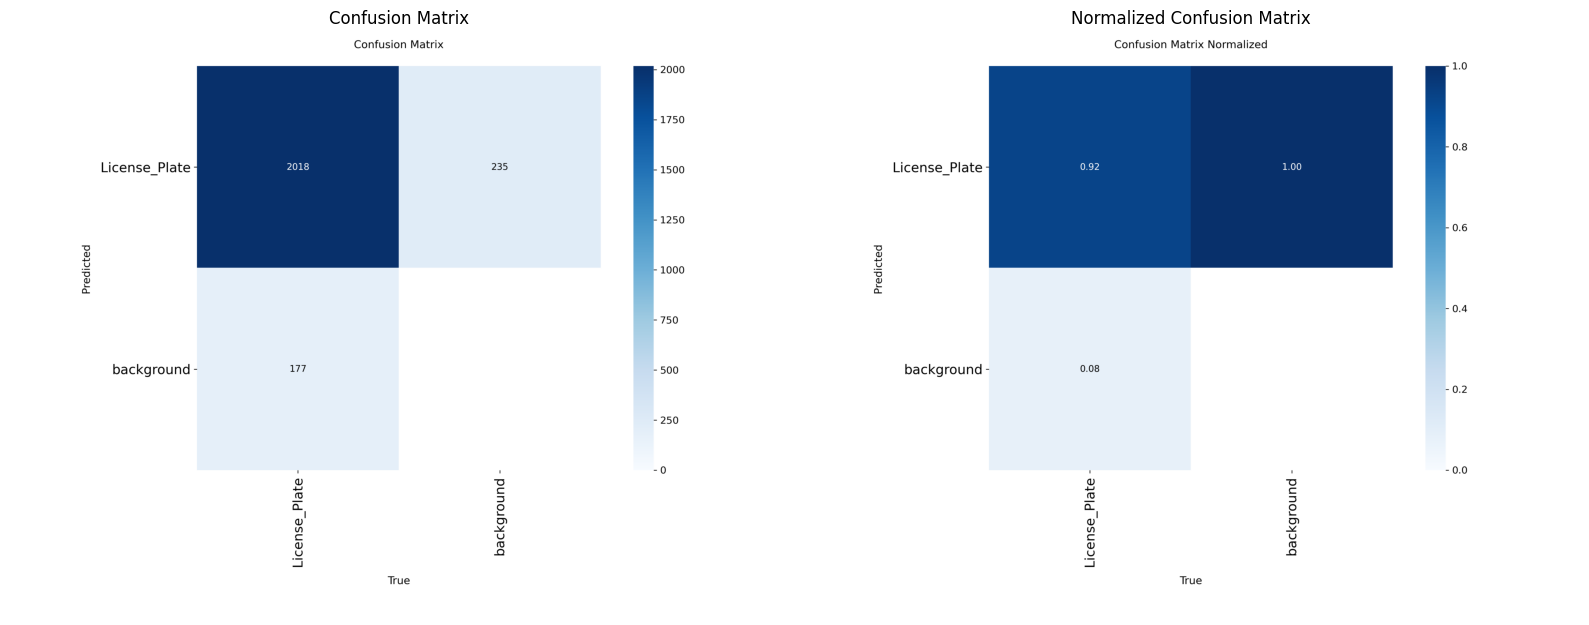

In [22]:

# Paths to your 2 images
img1 = "/kaggle/working/Number_Plate_Project/train/confusion_matrix.png"
img2 = "/kaggle/working/Number_Plate_Project/train/confusion_matrix_normalized.png"

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Display each image
axes[0].imshow(mpimg.imread(img1))
axes[0].axis("off")
axes[0].set_title("Confusion Matrix")

axes[1].imshow(mpimg.imread(img2))
axes[1].axis("off")
axes[1].set_title("Normalized Confusion Matrix")

plt.tight_layout()
plt.show()



### Plots

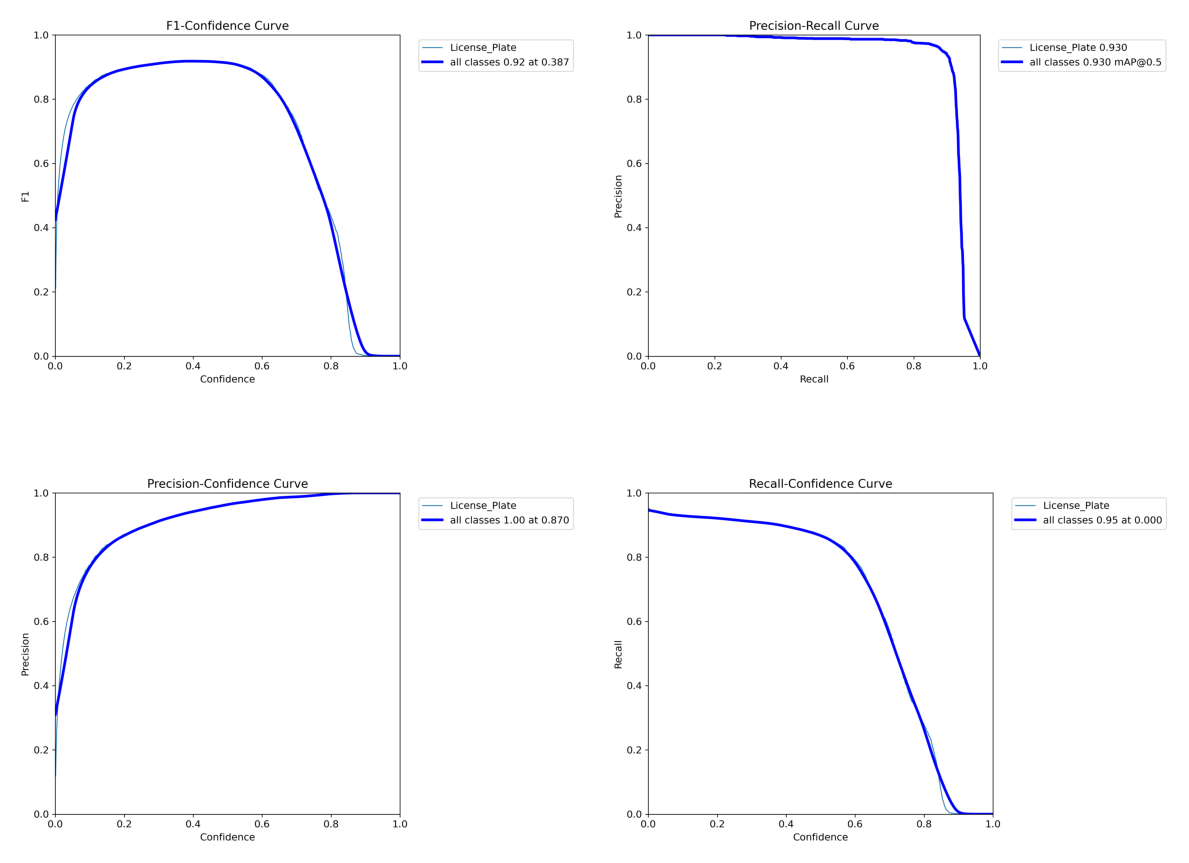

In [17]:

# Paths to your 4 images
img1 = "/kaggle/working/Number_Plate_Project/train/BoxF1_curve.png"
img2 = "/kaggle/working/Number_Plate_Project/train/BoxPR_curve.png"
img3 = "/kaggle/working/Number_Plate_Project/train/BoxP_curve.png"
img4 = "/kaggle/working/Number_Plate_Project/train/BoxR_curve.png"

# Create subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display each image
axes[0, 0].imshow(mpimg.imread(img1))
axes[0, 0].axis("off")

axes[0, 1].imshow(mpimg.imread(img2))
axes[0, 1].axis("off")

axes[1, 0].imshow(mpimg.imread(img3))
axes[1, 0].axis("off")

axes[1, 1].imshow(mpimg.imread(img4))
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


### Visualise random GT v/s PR

In [11]:


def yolo_to_xyxy(bbox_line, img_w, img_h):
    """Convert YOLO annotation line to pixel coordinates."""
    parts = bbox_line.strip().split()
    if len(parts) < 5:
        return None
    cls = int(parts[0])
    x_c, y_c, bw, bh = map(float, parts[1:5])
    xmin = int((x_c - bw / 2) * img_w)
    ymin = int((y_c - bh / 2) * img_h)
    xmax = int((x_c + bw / 2) * img_w)
    ymax = int((y_c + bh / 2) * img_h)
    return cls, xmin, ymin, xmax, ymax


def visualize_gt_vs_pred(
    model_path, 
    images_dir, 
    labels_dir, 
    num_images=5, 
    imgsz=640, 
    conf=0.35, 
    iou=0.30, 
    tta=False
):
    """
    Visualize ground truth vs predictions.
    GT → Green boxes
    Predictions → Red boxes
    """
    # Load trained YOLO model
    model = YOLO(model_path, task="detect")

    image_paths = glob.glob(f"{images_dir}/*.jpg")
    random.shuffle(image_paths)
    image_paths = image_paths[:num_images]

    plt.figure(figsize=(15, num_images * 5))

    for idx, img_path in enumerate(image_paths, 1):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        # --- Draw GT ---
        label_path = f"{labels_dir}/{img_path.split('/')[-1].replace('.jpg','.txt')}"
        try:
            with open(label_path, "r") as f:
                labels = f.readlines()
            for line in labels:
                gt = yolo_to_xyxy(line, w, h)
                if gt:
                    _, xmin, ymin, xmax, ymax = gt
                    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0), 2)  # green
        except FileNotFoundError:
            pass  # in case no label file

        # --- Run YOLO prediction ---
        results = model.predict(img_path, imgsz=imgsz, conf=conf, iou=iou, augment=tta, verbose=False)
        for result in results:
            for box in result.boxes.xyxy.cpu().numpy():
                xmin, ymin, xmax, ymax = map(int, box[:4])
                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), 2)  # red

        # Show in subplot
        plt.subplot(num_images, 1, idx)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"GT (green) vs Pred (red) - {img_path.split('/')[-1]}")

    plt.tight_layout()
    plt.show()
    


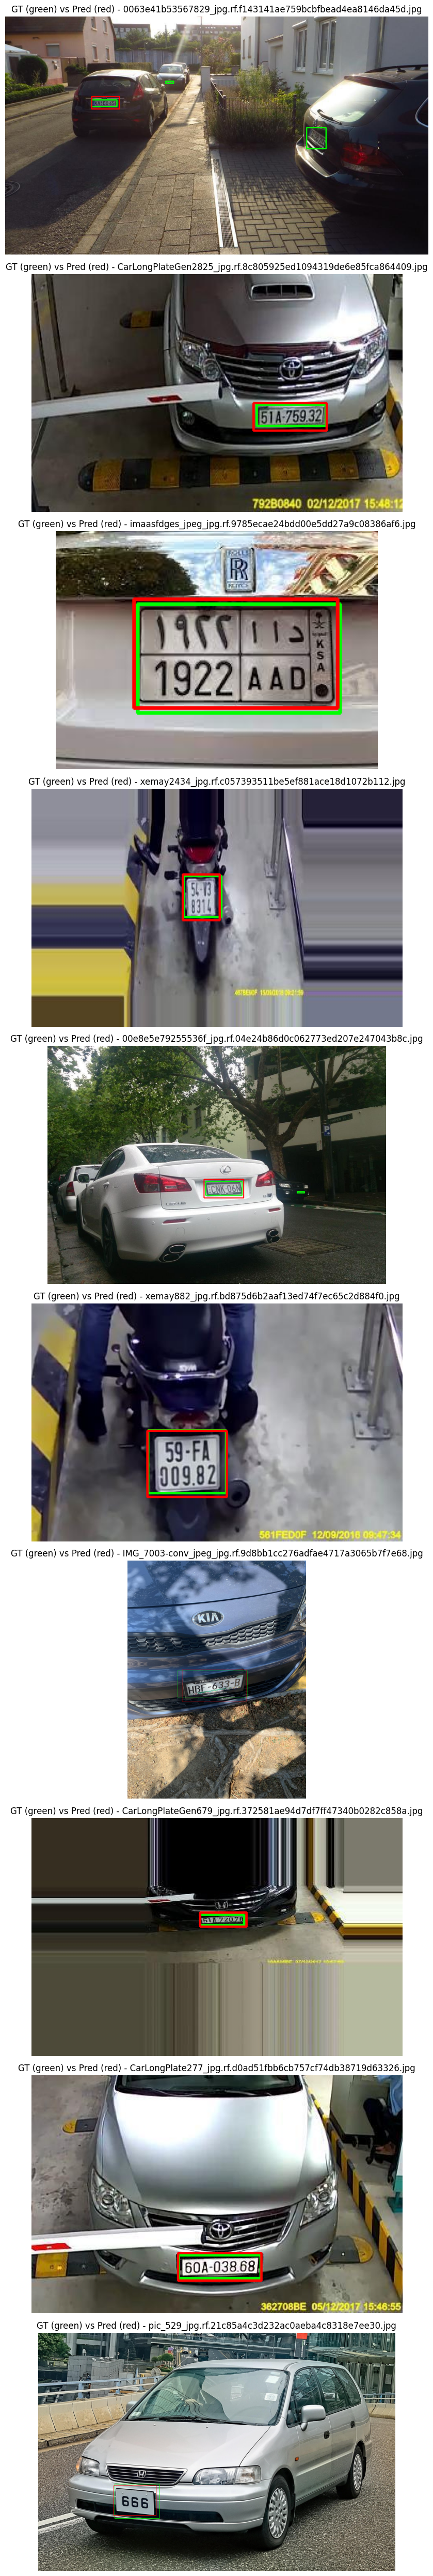

In [12]:
visualize_gt_vs_pred(
    model_path="/kaggle/working/Number_Plate_Project/train/weights/best.pt",
    images_dir="/kaggle/input/number-plate/test/images",
    labels_dir="/kaggle/input/number-plate/test/labels",
    num_images=10,
    imgsz=640,
    conf=0.35,
    iou=0.30
)

## Number Plate Recognition using Easy OCR

In [26]:

# Load YOLO (trained for number plates)

yolo_model = YOLO("/kaggle/working/Number_Plate_Project/train/weights/best.pt")  

# Load EasyOCR reader

reader = easyocr.Reader(['en'])  # English


In [91]:
# -------------------------
# Enhance cropped image
# -------------------------
def enhance_image(img, alpha=1.5, beta=40):
    """
    Enhance brightness and contrast of image
    alpha > 1 : increase contrast
    beta > 0  : increase brightness
    """
    enhanced = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return enhanced


def detect_and_read_plate(image_path, conf=0.25, buffer=5, alpha=1.5, beta=40):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image {image_path}")

    # Run YOLO detection
    results = yolo_model.predict(img, conf=conf, verbose=False)
    detected_texts = []

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]

        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            h, w = img.shape[:2]

            # 🔹 Add buffer around box
            x1 = max(0, x1 - buffer)
            y1 = max(0, y1 - buffer)
            x2 = min(w, x2 + buffer)
            y2 = min(h, y2 + buffer)

            crop = img[y1:y2, x1:x2]

            # Enhance cropped plate before OCR
            enhanced_crop = enhance_image(crop, alpha=alpha, beta=beta)

            # OCR on Enhanced cropped plate
            ocr_results = reader.readtext(enhanced_crop)

            plate_lines = []
            for res in ocr_results:
                text = res[1]
                clean_text = "".join(ch for ch in text if ch.isalnum()).upper()
                if clean_text:
                    plate_lines.append(clean_text)

            if plate_lines:
                detected_texts.append(" ".join(plate_lines))

                # Draw bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # 🔹 Draw each line of text separately (no overlap)
                for i, line in enumerate(reversed(plate_lines)):
                    y_offset = y1 - 10 - (i * 30)
                    cv2.putText(img, line, (x1, y_offset),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show final image with bounding boxes + OCR text
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("YOLO Detection + OCR Result")
    plt.show()

    return detected_texts


In [88]:
def test_random_images(test_dir, n=5, conf=0.25, buffer=5, alpha=1.5, beta=40):
    """
    Pick n random images from test_dir, run detection + OCR, and display results.
    """
    # Collect all image paths
    image_paths = glob.glob(os.path.join(test_dir, "*.jpg")) + \
                  glob.glob(os.path.join(test_dir, "*.png")) + \
                  glob.glob(os.path.join(test_dir, "*.jpeg"))
    
    if not image_paths:
        raise ValueError(f"No images found in {test_dir}")

    # Select random subset
    selected_images = random.sample(image_paths, min(n, len(image_paths)))

    all_results = {}

    for img_path in selected_images:
        print(f"\nProcessing: {os.path.basename(img_path)}")
        texts = detect_and_read_plate(img_path, conf=conf, buffer=buffer, alpha=alpha, beta=beta)
        all_results[img_path] = texts
        print("Detected:", texts)

    return all_results



Processing: CarLongPlateGen2837_jpg.rf.131aa14f2909a3ed7b21671ad8d726b0.jpg


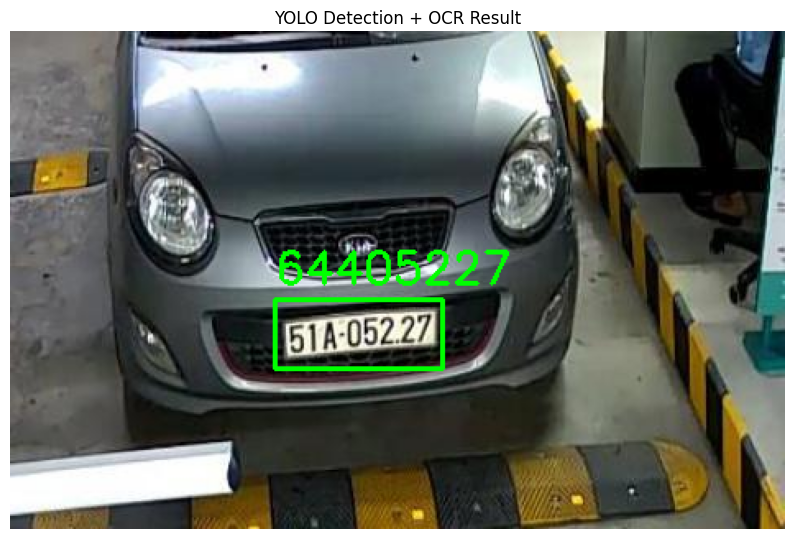

Detected: ['64405227']

Processing: CarLongPlateGen1290_jpg.rf.439a7e61c5028f1d74f475a127c27683.jpg


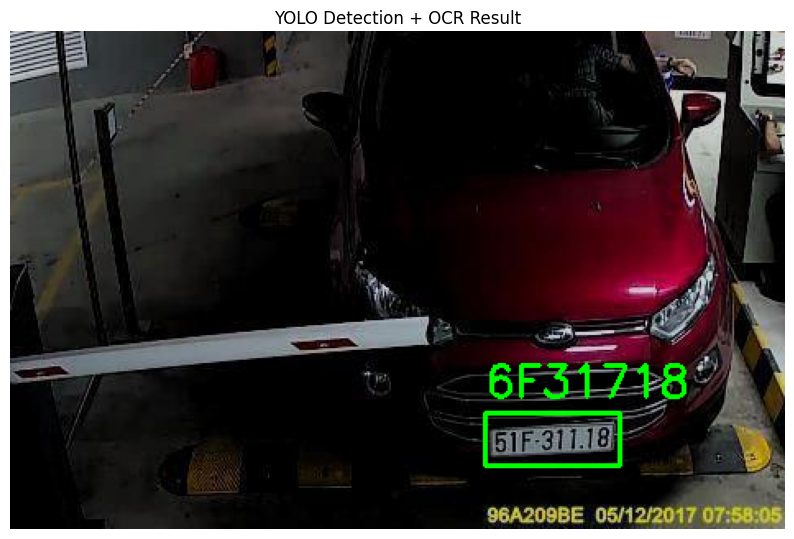

Detected: ['6F31718']

Processing: CarLongPlate405_jpg.rf.a5ac9155dd61fbb95a078e0ff8c4e3e3.jpg


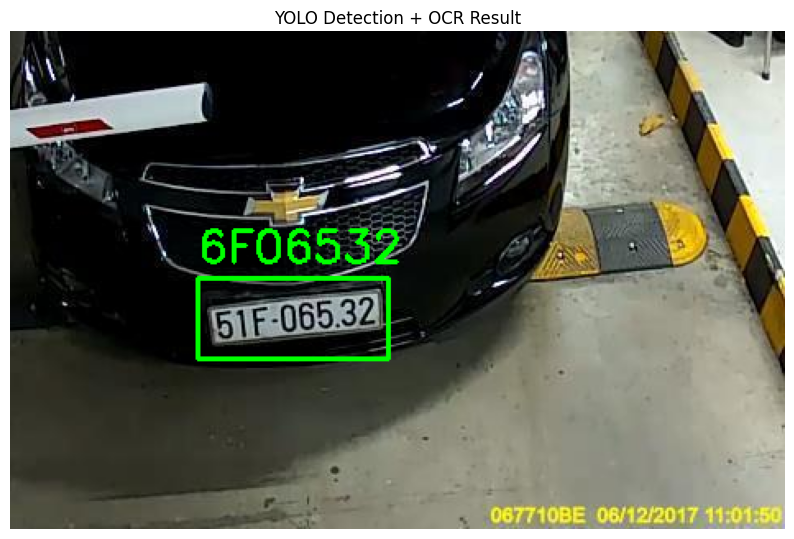

Detected: ['6F06532']

Processing: xemay472_jpg.rf.eb2c016163fe5f93546b9a7918124449.jpg


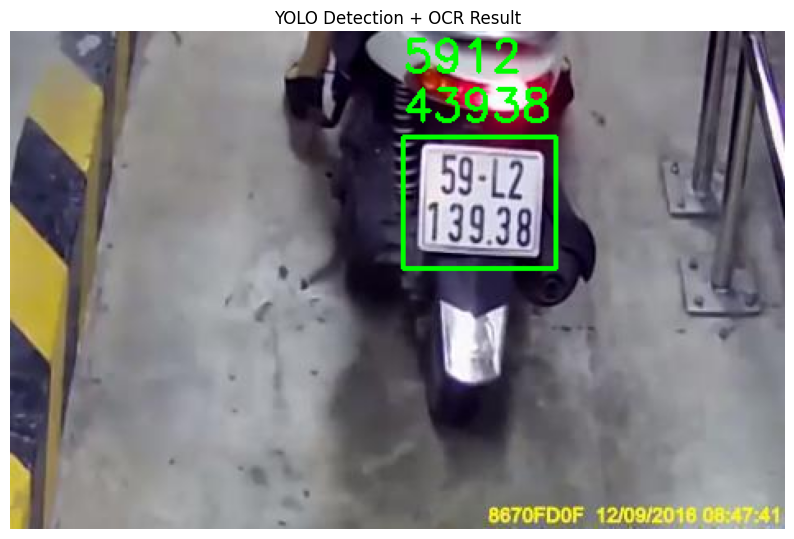

Detected: ['5912 43938']

Processing: xemayBigPlate139_jpg.rf.7746595c8d2eb1b527728189d982002c.jpg


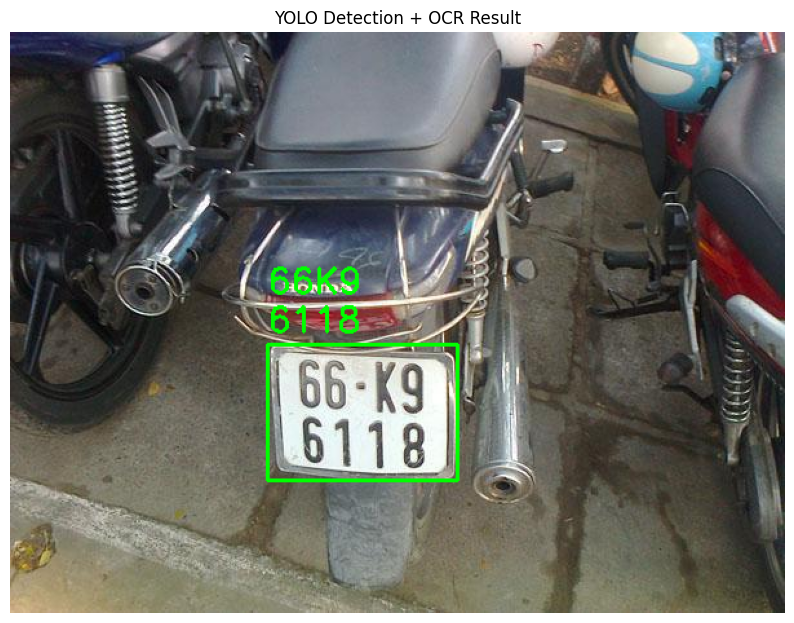

Detected: ['66K9 6118']


In [99]:
results = test_random_images("/kaggle/input/number-plate/test/images", n=5, conf=0.20, buffer=0, alpha=1, beta=20)